In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline
import os

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier   

def data_preparation_for_relationship(dataset,m):
    r = []
    for i in range(len(dataset)):
        r.append(dataset[i][m])
    return r

dirname = os.path.abspath('./')
filename1 = os.path.join(dirname,'winequality-red.csv')

redwine_data = np.loadtxt(filename1,delimiter=';',comments='#',skiprows=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


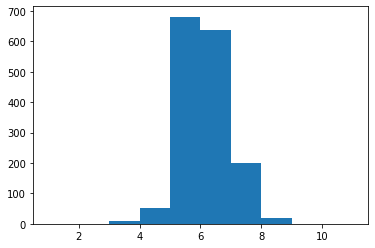

In [145]:
# histrogram
histrogram = data_preparation_for_relationship(redwine_data,11)
plt.figure()
plt.hist(histrogram,bins = range(1,12))
    
redwine = pd.read_csv('winequality-red.csv',delimiter = ';')
display(redwine.head())

header = []
for col in redwine.columns:
    header.append(col)

In [146]:
# Paired t test
print("Redwine")
print("----------------------------------------------")

for i in range(0, len(redwine_data[1])-1):
    x = data_preparation_for_relationship(redwine_data,i)
    t,p = stats.ttest_rel(x,data_preparation_for_relationship(redwine_data,11))
    compare = header[i]
    print('P value of',compare, 'and quality is ')
    print(p)
    if p < 0.05:
        print("Hypothesis is rejected. SIGNIFICANT !")
    else: print("NOT SIGNIFICANT !")
    print("==============================================")

Redwine
----------------------------------------------
P value of fixed acidity and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of volatile acidity and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of citric acid and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of residual sugar and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of chlorides and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of free sulfur dioxide and quality is 
3.0434756940062495e-233
Hypothesis is rejected. SIGNIFICANT !
P value of total sulfur dioxide and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of density and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of pH and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of sulphates and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !
P value of alcohol and quality is 
0.0
Hypothesis is rejected. SIGNIFICANT !


In [147]:
# Regression
print("Redwine")
print("----------------------------------------------")
for i in range(0,len(redwine_data[1])-1):
    x = data_preparation_for_relationship(redwine_data,i)
    linre = stats.linregress(x,data_preparation_for_relationship(redwine_data,11))
    compare = header[i]
    print('P value of',compare, 'and quality is ')
    print(linre.pvalue)
    if linre.pvalue < 0.05:
        print("Hypothesis is rejected. SIGNIFICANT !")
    else: print("NOT SIGNIFICANT !")
    print("==============================================")

Redwine
----------------------------------------------
P value of fixed acidity and quality is 
6.495635009279552e-07
Hypothesis is rejected. SIGNIFICANT !
P value of volatile acidity and quality is 
2.0517148070137957e-59
Hypothesis is rejected. SIGNIFICANT !
P value of citric acid and quality is 
4.99129525050853e-20
Hypothesis is rejected. SIGNIFICANT !
P value of residual sugar and quality is 
0.5832180131580473
NOT SIGNIFICANT !
P value of chlorides and quality is 
2.3133826540584013e-07
Hypothesis is rejected. SIGNIFICANT !
P value of free sulfur dioxide and quality is 
0.042833979508140954
Hypothesis is rejected. SIGNIFICANT !
P value of total sulfur dioxide and quality is 
8.621703423655394e-14
Hypothesis is rejected. SIGNIFICANT !
P value of density and quality is 
1.874956652010331e-12
Hypothesis is rejected. SIGNIFICANT !
P value of pH and quality is 
0.02096277865147354
Hypothesis is rejected. SIGNIFICANT !
P value of sulphates and quality is 
1.8020884534523016e-24
Hypothe

In [160]:
a = [1,2,3,5,6,7,9,10]

x_train, x_test, y_train, y_test = train_test_split(redwine_data[:,a], redwine_data[:,11], test_size = 0.2, random_state = 42)

#PCA
# x = np.vstack([x_train]).T
# pca = PCA(n_components=3)
# pca.fit(x)
# print(pca.components_)
# print(pca.explained_variance_ratio_)

# K-Mean clusting
knn    = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("knn",knn.score(x_test, y_test))
    
tree = DecisionTreeClassifier(random_state=1) 
tree.fit(x_train, y_train) 
print("tree",tree.score(x_test, y_test))

knn 0.446875
tree 0.58125
